# WeatherPy
----

### Analysis
* Cities located close to 0 degreess latitude appear to consistently have higher max temperatures.
* Cities located close to 0 degrees latitude appear to have over 60% humidity.
* Cities located close to 0 degrees latitude do not appear to differ from cities located all over the globe when it comes to cloudiness and wind speed.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['kedgwick', 'bredasdorp', 'tsihombe', 'umzimvubu', 'dukat', 'pyapon', 'luz', 'taolanaro', 'avarua', 'jamestown', 'illoqqortoormiut', 'rikitea', 'prince george', 'qaanaaq', 'amasya', 'tasiilaq', 'wasilla', 'kapaa', 'dawei', 'elmira', 'khatanga', 'whitehorse', 'namatanai', 'chernyshevskiy', 'amderma', 'abu kamal', 'mataura', 'sindor', 'barrow', 'braganca', 'tuy hoa', 'nanortalik', 'paidha', 'cayenne', 'camacha', 'longyearbyen', 'padang', 'ayan', 'hobart', 'cape town', 'albany', 'kimbe', 'elk plain', 'kodiak', 'thompson', 'severo-kurilsk', 'ushuaia', 'port-gentil', 'tuktoyaktuk', 'busselton', 'mizdah', 'antalaha', 'port moresby', 'colquechaca', 'duayaw nkwanta', 'arraial do cabo', 'ancud', 'hilo', 'port alfred', 'vaini', 'duz', 'norman wells', 'mar del plata', 'sao joao da barra', 'tual', 'adre', 'castro', 'ucluelet', 'mount gambier', 'souillac', 'punta arenas', 'sao miguel', 'tura', 'isangel', 'puerto ayora', 'talnakh', 'new norfolk', 'cherskiy', 'kokkola', 'bluff', 'la ronge', 'attawap

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [7]:
#print(response.geturl())
      

In [8]:
cities_list = cities
#lists to hold reponse info
lat = []
lng = []
temp = []
hum = []
cloud = []
wind_speed = []
country = []
date = []
valid_cities = []

for town in cities_list:
    try: 
        response = requests.get(query_url + town).json()
        #print(response.geturl())
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        valid_cities.append(town)
    except: 
        print('City was not found.')

City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.
City was not found.


In [9]:
print(len(lat))
print(len(lng))
print(len(temp))
print(len(hum))
print(len(cloud))
print(len(wind_speed))
print(len(country))
print(len(date))
print(len(valid_cities))

574
574
574
574
574
574
574
574
574


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    "City": valid_cities,
    "Cloudines": cloud,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudines,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kedgwick,100,CA,1556377366,91,47.65,-67.35,44.60,19.28
1,bredasdorp,0,ZA,1556377277,56,-34.53,20.04,72.00,8.05
2,dukat,100,RS,1556377313,84,42.44,22.31,57.00,1.99
3,pyapon,47,MM,1556377368,50,16.29,95.68,87.44,10.58
4,luz,3,BR,1556377368,66,-19.79,-45.68,78.44,5.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

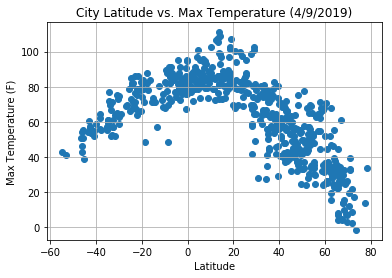

In [13]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (4/9/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

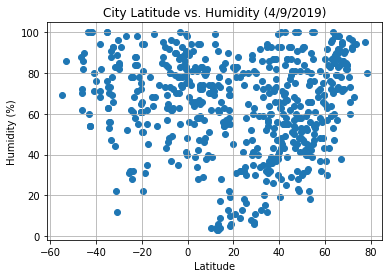

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (4/9/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

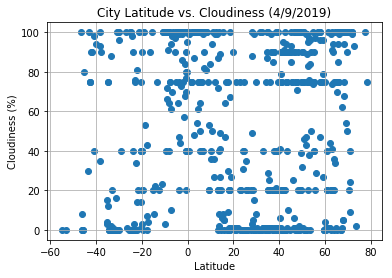

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Cloudines"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (4/9/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

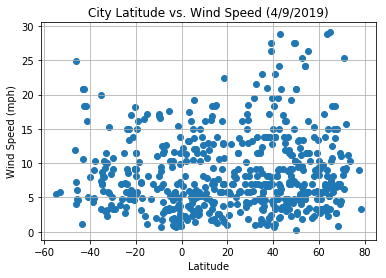

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (4/9/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()